C:\Users\SURYA\AppData\Local\Temp\ipykernel_28508\2514158421.py:10: DtypeWarning: Columns (27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


### Dataset Overview ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   resultId                  26759 non-null  int64  
 1   raceId                    26759 non-null  int64  
 2   driverId                  26759 non-null  int64  
 3   constructorId             26759 non-null  int64  
 4   number                    26753 non-null  float64
 5   grid                      26759 non-null  int64  
 6   position                  15806 non-null  float64
 7   positionText              26759 non-null  object 
 8   positionOrder             26759 non-null  int64  
 9   points                    26759 non-null  float64
 10  laps                      26759 non-null  int64  
 11  time_result               7680 non-null   object 
 12  milliseconds              7680 non-null   float64
 13  fastestLap                8252 non-n

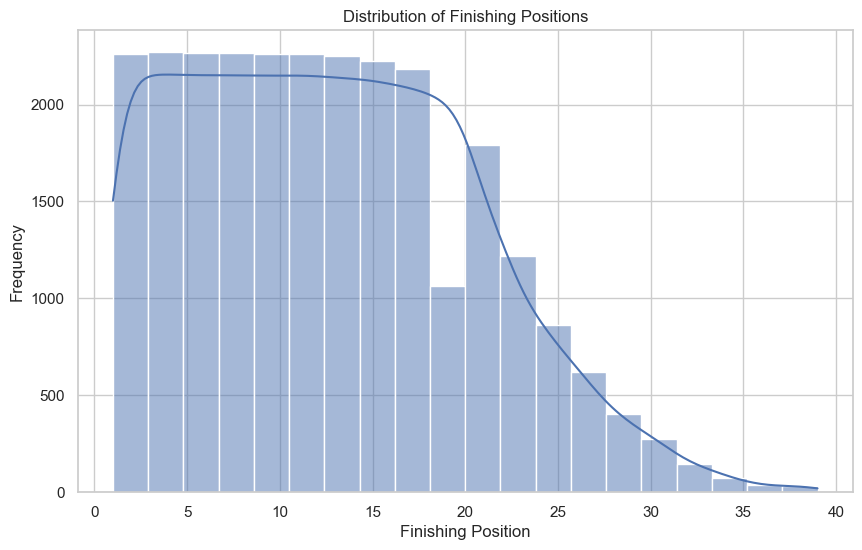

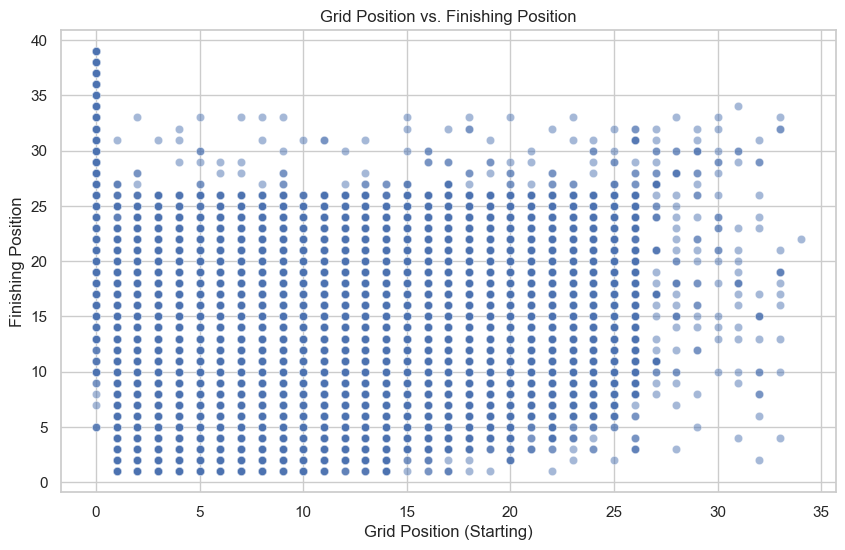


Correlation between Grid Position and Finishing Position: 0.17


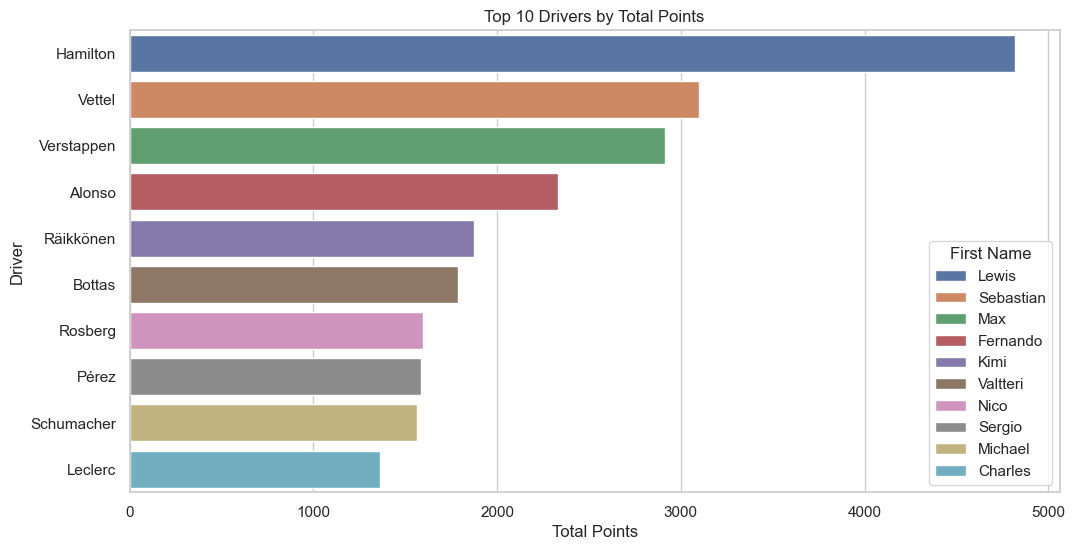

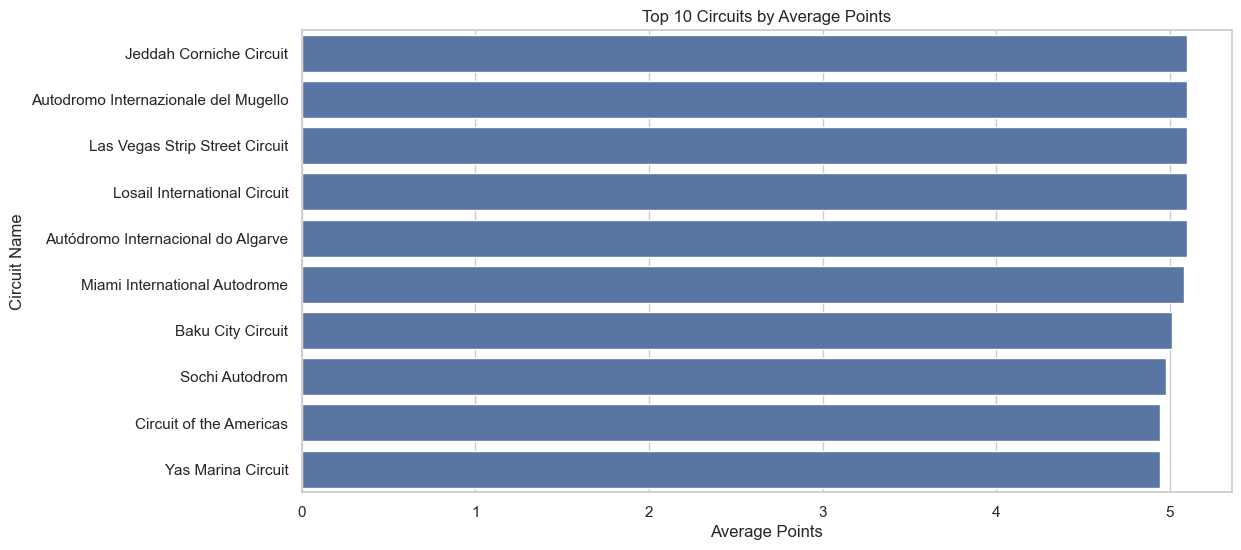

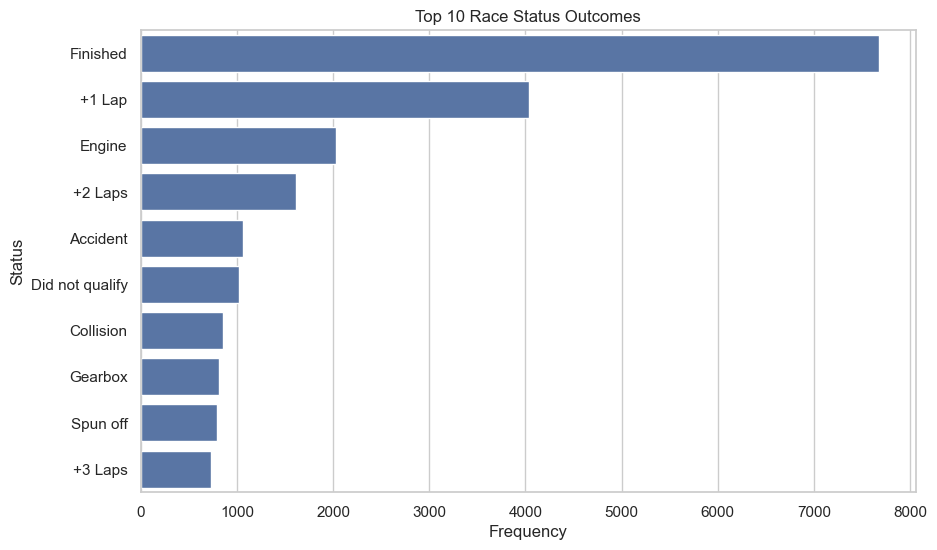

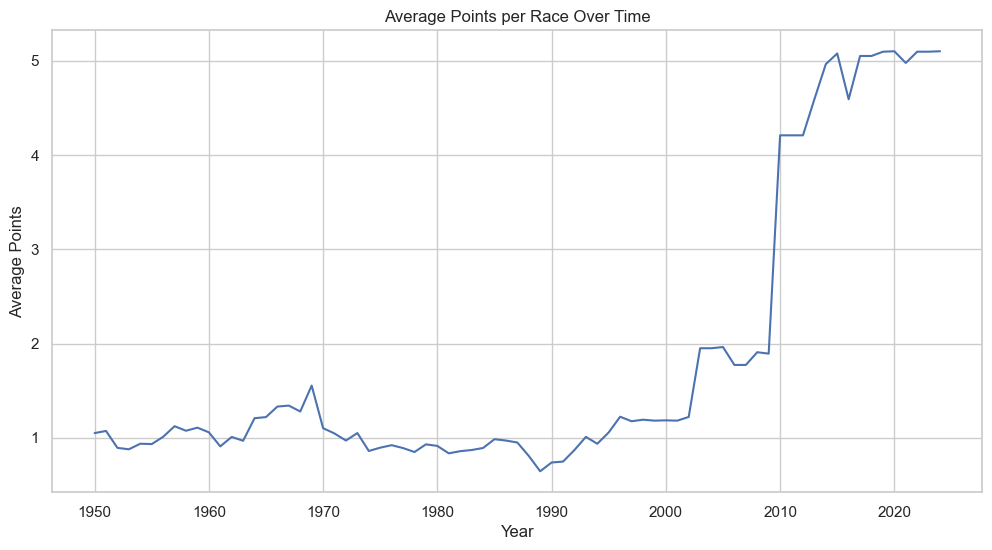

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid")

# Load the master race results table
file_path = 'Cleaned_Dataset/master_race_results.csv'
data = pd.read_csv(file_path)

# --- 1. Basic Overview ---
print("### Dataset Overview ###")
print(data.info())  # Check data types and missing values
print("\n### Sample Data ###")
print(data.head())

# --- 2. Distribution of Finishing Positions ---
plt.figure(figsize=(10, 6))
sns.histplot(data['positionOrder'], bins=20, kde=True)
plt.title('Distribution of Finishing Positions')
plt.xlabel('Finishing Position')
plt.ylabel('Frequency')
plt.show()

# --- 3. Grid Position vs. Finishing Position ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grid', y='positionOrder', data=data, alpha=0.5)
plt.title('Grid Position vs. Finishing Position')
plt.xlabel('Grid Position (Starting)')
plt.ylabel('Finishing Position')
plt.show()

# Calculate correlation
corr_grid_finish = data['grid'].corr(data['positionOrder'])
print(f"\nCorrelation between Grid Position and Finishing Position: {corr_grid_finish:.2f}")

# --- 4. Points Distribution by Driver ---
top_drivers = data.groupby(['driverId', 'forename', 'surname'])['points'].sum().reset_index()
top_drivers = top_drivers.sort_values(by='points', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='points', y='surname', hue='forename', data=top_drivers, dodge=False)
plt.title('Top 10 Drivers by Total Points')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.legend(title='First Name', loc='lower right')
plt.show()

# --- 5. Performance by Circuit ---
circuit_performance = data.groupby('name_circuit')['points'].mean().reset_index()
circuit_performance = circuit_performance.sort_values(by='points', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='points', y='name_circuit', data=circuit_performance)
plt.title('Top 10 Circuits by Average Points')
plt.xlabel('Average Points')
plt.ylabel('Circuit Name')
plt.show()

# --- 6. Status Analysis ---
status_counts = data['status'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.values, y=status_counts.index)
plt.title('Top 10 Race Status Outcomes')
plt.xlabel('Frequency')
plt.ylabel('Status')
plt.show()  

yearly_points = data.groupby('year')['points'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='points', data=yearly_points)
plt.title('Average Points per Race Over Time')
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.show()